In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

In [152]:
datos_txt = glob("../Valores2/*.txt")
datos_txt

['../Valores2\\16384_1.txt',
 '../Valores2\\16384_16.txt',
 '../Valores2\\16384_2.txt',
 '../Valores2\\16384_32.txt',
 '../Valores2\\16384_4.txt',
 '../Valores2\\16384_64.txt',
 '../Valores2\\16384_8.txt',
 '../Valores2\\32768_1.txt',
 '../Valores2\\32768_16.txt',
 '../Valores2\\32768_2.txt',
 '../Valores2\\32768_32.txt',
 '../Valores2\\32768_4.txt',
 '../Valores2\\32768_64.txt',
 '../Valores2\\32768_8.txt',
 '../Valores2\\4096_1.txt',
 '../Valores2\\4096_16.txt',
 '../Valores2\\4096_2.txt',
 '../Valores2\\4096_32.txt',
 '../Valores2\\4096_4.txt',
 '../Valores2\\4096_64.txt',
 '../Valores2\\4096_8.txt',
 '../Valores2\\8192_1.txt',
 '../Valores2\\8192_16.txt',
 '../Valores2\\8192_2.txt',
 '../Valores2\\8192_32.txt',
 '../Valores2\\8192_4.txt',
 '../Valores2\\8192_64.txt',
 '../Valores2\\8192_8.txt']

In [165]:
datos = []
for path in datos_txt:
    tamanio, np_ = path.split("\\")[1].split("_")
    np_ = np_.split(".")[0]
    archivo = open(path, "r")
    filas = archivo.readlines()[-5:]
    gflops = filas[0].split(' ')[3]
    total = filas[-1].split(' ')[4]
    comm = filas[-2].split(' ')[3]
    force = filas[-3].split(' ')[4]
    #print(f"{tamanio}, {np_}, {gflops}, {total}, {comm}, {force}")
    datos.append([tamanio, np_, gflops, total, comm, force])

In [166]:
def ordenarTamanioNp(x):
    tamanio = int(x[0])
    np_ = int(x[1])
    return [tamanio, np_]

In [167]:
datos = sorted(datos, key = ordenarTamanioNp)


In [168]:
n = 7
for i in range(0, len(datos), n):
    nombre_file = f"{datos[i][0]}.csv"
    file = open(nombre_file, "w")
    titulo ="tamanio,NP,gflops,total,comm,force,speedup,efficiency\n"
    file.write(titulo)
    for j in range(i, i + n):
        speedup = float(datos[i][-3]) / float(datos[j][-3])
        eficiencia = speedup / float(datos[j][1])
        tamanio = datos[j][0]
        np_ = datos[j][1]
        
        gflops = datos[j][2]
    
        total = datos[j][3]
        comm = datos[j][4]
        force = datos[j][-1]
        linea =f"{tamanio},{np_},{gflops},{total},{comm},{force},{speedup},{eficiencia}\n"
        file.write(linea)
    file.close()
    

## Data

In [169]:
csv_4096 = pd.read_csv("4096.csv")
csv_8192 = pd.read_csv("8192.csv")
csv_16384 = pd.read_csv("16384.csv")
csv_32768 = pd.read_csv("32768.csv")

In [173]:
csv_32768.head(10)

,tamanio,NP,gflops,total,comm,force,speedup,efficiency
0,32768,1,5.724,3559.40,0.042498,121230.0,1.000000,1.000000
1,32768,2,11.419,1784.30,0.198950,60697.0,1.994844,0.997422
2,32768,4,22.820,892.80,1.163400,30305.0,3.986783,0.996696
3,32768,8,45.161,451.11,0.900340,15243.0,7.890315,0.986289
4,32768,16,86.970,234.24,1.419400,7821.9,15.195526,0.949720
5,32768,32,142.027,143.43,24.999000,3924.8,24.816287,0.775509
6,32768,64,176.602,115.33,48.893000,2104.5,30.862742,0.482230


In [176]:
def getDataPorLabel(label, dataframes, 
                    xaxis_begin=None, xaxis_end = None,
                    yaxis_begin=None, yaxis_end = None):
    NP = [1, 2, 4, 8, 16, 32, 64]
    legenda = ["4k", "8k", "16k", "32k"]
    colores = ["red", "green", "blue", "orange"]
    markers = ["|", "x", "P", "s", "d", "o"]
    i = 0
    titulos = {
        "speedup" : ["Speedup vs NP","Speedup"],
        "total" : ["Tiempo total(s) vs NP", "Tiempo total(s)"],
        "gflops" : ["Speed (GFLOPS) vs NP", "Speed (GFLOPS)"],
        "comm": ["Tiempo de Comunicacion vs NP", "Tiempo de Comunicacion"],
        "efficiency": ["Eficiencia vs NP", "Eficiencia"],
        "force" : ["Tiempo de calculo de la fuerza(s) vs NP","Tiempo de calculo de la fuerza(s)"]
    }
    if label == "speedup":
        plt.plot([i for i in range(33)], [i for i in range(33)], color="black", label = "Ideal")
    if label == "efficiency":
        plt.plot([i for i in range(33)], [1 for i in range(33)], color="black", label = "Ideal")
    for df in dataframes:
        y = list(df[label])
        plt.plot(NP, y, color = colores[i],label=legenda[i], marker=markers[i], markersize= 6)
        plt.legend()
        i+=1
    plt.title(titulos[label][0])
    plt.xlabel("NP")
    plt.ylabel(titulos[label][1])
    plt.savefig(f"{titulos[label][1]}.png")


### Eficiencia VS NP

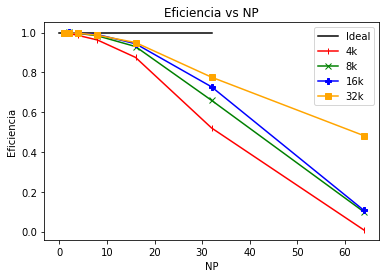

In [177]:
getDataPorLabel("efficiency", [csv_4096, csv_8192, csv_16384, csv_32768])

### GFLOPS VS NP

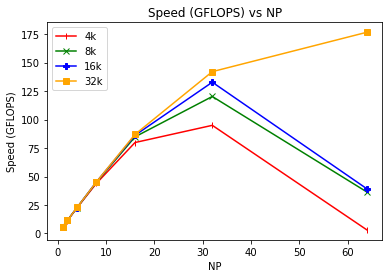

In [178]:
getDataPorLabel("gflops", [csv_4096, csv_8192, csv_16384, csv_32768])

### Speedup VS NP

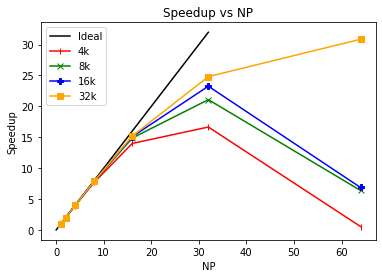

In [179]:
getDataPorLabel("speedup", [csv_4096, csv_8192, csv_16384, csv_32768])

### Force vs NP

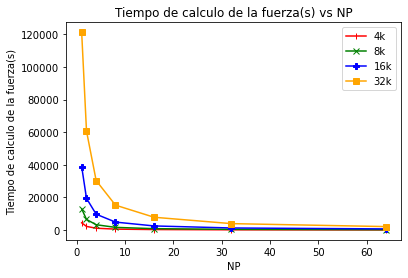

In [180]:
getDataPorLabel("force", [csv_4096, csv_8192, csv_16384, csv_32768])

### Comunicacion vs NP

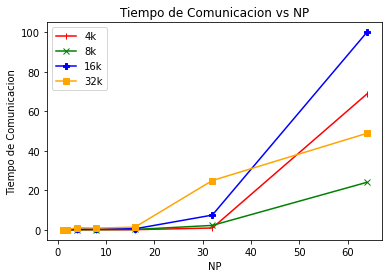

In [181]:
getDataPorLabel("comm", [csv_4096, csv_8192, csv_16384, csv_32768])

### Tiempo Total vs NP

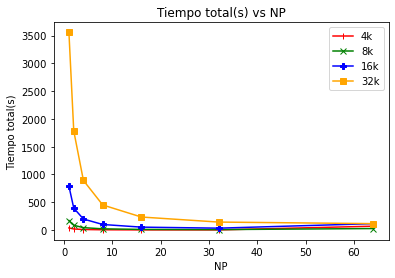

In [182]:
getDataPorLabel("total", [csv_4096, csv_8192, csv_16384, csv_32768])